Generate the figure of $D_{eff}/D_{bulk}$ for the different analysis types and channel widths.

In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
df=pd.read_pickle('../data/postproc/yummy-press/collected_results.pkl.gz')

In [5]:
def calc_ratio(row,numerator,denominator):
    return row[numerator]/row[denominator]

In [6]:
def calc_height(row):
  return 2*row['R']

In [7]:
def calc_phi(row):
  return row['R']/row['L']

In [8]:
calc_ratio_nonhomog=lambda row: calc_ratio(row,'D_eff','D_bulk')

In [9]:
calc_ratio_homog=lambda row: calc_ratio(row,'D_macro_1_1','D_bulk')

In [10]:
def calc_ratio_general(row):
  if row['equation'].lower() == 'projector':
    return 'n/a'
  else:
    if row['equation'].split('_')[1].lower()=='unhomog':
      return calc_ratio(row,'D_eff','D_bulk')
    else:
      return calc_ratio(row,'D_macro_1_1','D_bulk')

In [11]:
def homogtype(row):
  sr=row['modelname'].split('_')
  if len(sr)<4 or row['equation'].lower()=='projector':
    return 'na'
  else:
    return sr[3]

In [12]:
df['ratio_D']=df.apply(calc_ratio_general,axis=1)

In [13]:
df['2R']=df.apply(calc_height,axis=1)

In [14]:
df['phi']=df.apply(calc_phi,axis=1)

In [15]:
df['homogtype']=df.apply(homogtype,axis=1)

In [16]:
df['homogtype']

0        na
1        na
2        na
3        na
4        na
5     const
6        na
7     const
8        na
9     const
10       na
11    const
12       na
13     vary
14       na
15     vary
16       na
17     vary
18       na
19     vary
Name: homogtype, dtype: object

In [17]:
df.columns

Index(['elementorder', 'D_bulk', 'modelname', 'H', 'X2', 'R', 'mcarl', 'Y2',
       'L', 'Y1', 'X4', 'tm', 'X1', 'X5', 'Y3', 'X3', 'mcarh', 'equation',
       'D_eff', 'area_right', 'totflux_right', 'totflux_inner', 'totflux_left',
       'basename', 'meshname', 'expression', 'mcar', 'Ymid', 'Ly', 'Xmid',
       'Lx', 'boundaries_0', 'boundaries_1', 'boundaries_2', 'boundaries_3',
       'full_volume', 'D_macro_0_0', 'D_macro_0_1', 'D_macro_1_0',
       'D_macro_1_1', 'ratio_D', '2R', 'phi', 'homogtype'],
      dtype='object')

In [18]:
df

elementorder  D_bulk                     modelname   H    X2     R  mcarl  \
0              2       1       yummy-press_nonhomog_05  90  90.0  0.25      2   
1              2       1       yummy-press_nonhomog_10  90  90.0  0.50      2   
2              2       1       yummy-press_nonhomog_15  90  90.0  0.75      2   
3              2       1       yummy-press_nonhomog_20  90  90.0  1.00      2   
4              3     NaN  yummy-press_homog_05_const_D NaN   3.5   NaN    NaN   
5              3       1    yummy-press_homog_05_const NaN   3.5   NaN    NaN   
6              3     NaN  yummy-press_homog_10_const_D NaN   3.5   NaN    NaN   
7              3       1    yummy-press_homog_10_const NaN   3.5   NaN    NaN   
8              3     NaN  yummy-press_homog_15_const_D NaN   3.5   NaN    NaN   
9              3       1    yummy-press_homog_15_const NaN   3.5   NaN    NaN   
10             3     NaN  yummy-press_homog_20_const_D NaN   3.5   NaN    NaN   
11             3       1    yummy-press_homog_20_const NaN   3.5   NaN    NaN   
12             3     NaN   yummy-press_homog_05_vary_D NaN   3.5   NaN    NaN   
13             3       1     yummy-press_homog_05_vary NaN   3.5   NaN    NaN   
14             3     NaN   yummy-press_homog_10_vary_D NaN   3.5   NaN    NaN   
15             3       1     yummy-press_homog_10_vary NaN   3.5   NaN    NaN   
16             3     NaN   yummy-press_homog_15_vary_D NaN   3.5   NaN    NaN   
17             3       1     yummy-press_homog_15_vary NaN   3.5   NaN    NaN   
18             3     NaN   yummy-press_homog_20_vary_D NaN   3.5   NaN    NaN   
19             3       1     yummy-press_homog_20_vary NaN   3.5   NaN    NaN   

      Y2     L  Y1    ...      boundaries_3  full_volume  D_macro_0_0  \
0   0.25  2.65   0    ...               NaN          NaN          NaN   
1   0.50  2.90   0    ...               NaN          NaN          NaN   
2   0.75  3.15   0    ...               NaN          NaN          NaN   
3   1.00  3.40   0    ...               NaN          NaN          NaN   
4   0.50   NaN   0    ...               NaN          NaN          NaN   
5   0.50   NaN   0    ...              1112        18.55     0.094340   
6   1.00   NaN   0    ...               NaN          NaN          NaN   
7   1.00   NaN   0    ...              1112        20.30     0.172414   
8   1.50   NaN   0    ...               NaN          NaN          NaN   
9   1.50   NaN   0    ...              1112        22.05     0.238095   
10  2.00   NaN   0    ...               NaN          NaN          NaN   
11  2.00   NaN   0    ...              1112        23.80     0.294118   
12  0.50   NaN   0    ...               NaN          NaN          NaN   
13  0.50   NaN   0    ...              1112        18.55     0.112685   
14  1.00   NaN   0    ...               NaN          NaN          NaN   
15  1.00   NaN   0    ...              1112        20.30     0.199023   
16  1.50   NaN   0    ...               NaN          NaN          NaN   
17  1.50   NaN   0    ...              1112        22.05     0.289427   
18  2.00   NaN   0    ...               NaN          NaN          NaN   
19  2.00   NaN   0    ...              1112        23.80     0.351198   

     D_macro_0_1   D_macro_1_0  D_macro_1_1    ratio_D   2R       phi  \
0            NaN           NaN          NaN  0.0943757  0.5  0.094340   
1            NaN           NaN          NaN   0.172541  1.0  0.172414   
2            NaN           NaN          NaN   0.238352  1.5  0.238095   
3            NaN           NaN          NaN   0.294529  2.0  0.294118   
4            NaN           NaN          NaN        n/a  NaN       NaN   
5   7.617799e-20  5.986239e-21     0.094340  0.0943396  NaN       NaN   
6            NaN           NaN          NaN        n/a  NaN       NaN   
7  -1.188415e-21 -1.917181e-21     0.172414   0.172414  NaN       NaN   
8            NaN           NaN          NaN        n/a  NaN       NaN   
9   5.070608e-21  2.429585e-20     0.2

In [19]:
# xvals = np.array([2*R for R in df.loc[df['equation']=='fickian_unhomog']['R']])
xvals=df.loc[df['equation']=='fickian_unhomog']['2R']
xvals

0    0.5
1    1.0
2    1.5
3    2.0
Name: 2R, dtype: float64

In [20]:
yvals_unhomog=df.loc[df['equation']=='fickian_unhomog']['ratio_D']
yvals_unhomog

0    0.0943757
1     0.172541
2     0.238352
3     0.294529
Name: ratio_D, dtype: object

In [21]:
yvals_homog_const=df.loc[df['homogtype']=='const']['ratio_D']
yvals_homog_vary=df.loc[df['homogtype']=='vary']['ratio_D']

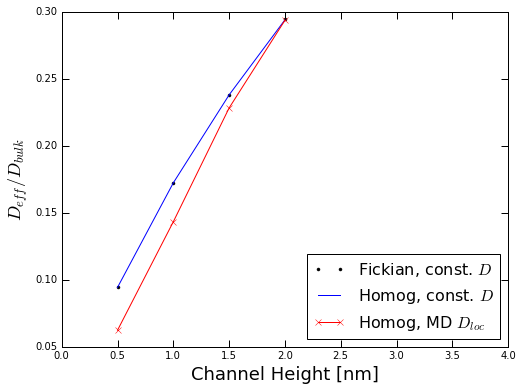

In [22]:
fig,ax=plt.subplots(figsize=(8,6))
o=ax.plot(xvals,yvals_unhomog,'k.',label='Fickian, const. $D$')
o=ax.plot(xvals,yvals_homog_const,'b-',label='Homog, const. $D$')
o=ax.plot(xvals,yvals_homog_vary,'rx-',label='Homog, MD $D_{loc}$')
# o=ax.set_ylim(0,1.2)
o=ax.set_xlim(0.0,4.0)
o=ax.tick_params(width=1.0,length=7)
o=ax.set_xlabel('Channel Height [nm]',fontsize=18)
o=ax.set_ylabel('$D_{eff}/D_{bulk}$',fontsize=18)
o=ax.legend(loc='lower right',fontsize=16)